In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 19 (delta 2), pack-reused 0
Receiving objects: 100% (29/29), 467.72 KiB | 9.54 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
path = '/content/data/pima-indians-diabetes3.csv'
df = pd.read_csv(path)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#당뇨환자 파악
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#상관관계
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


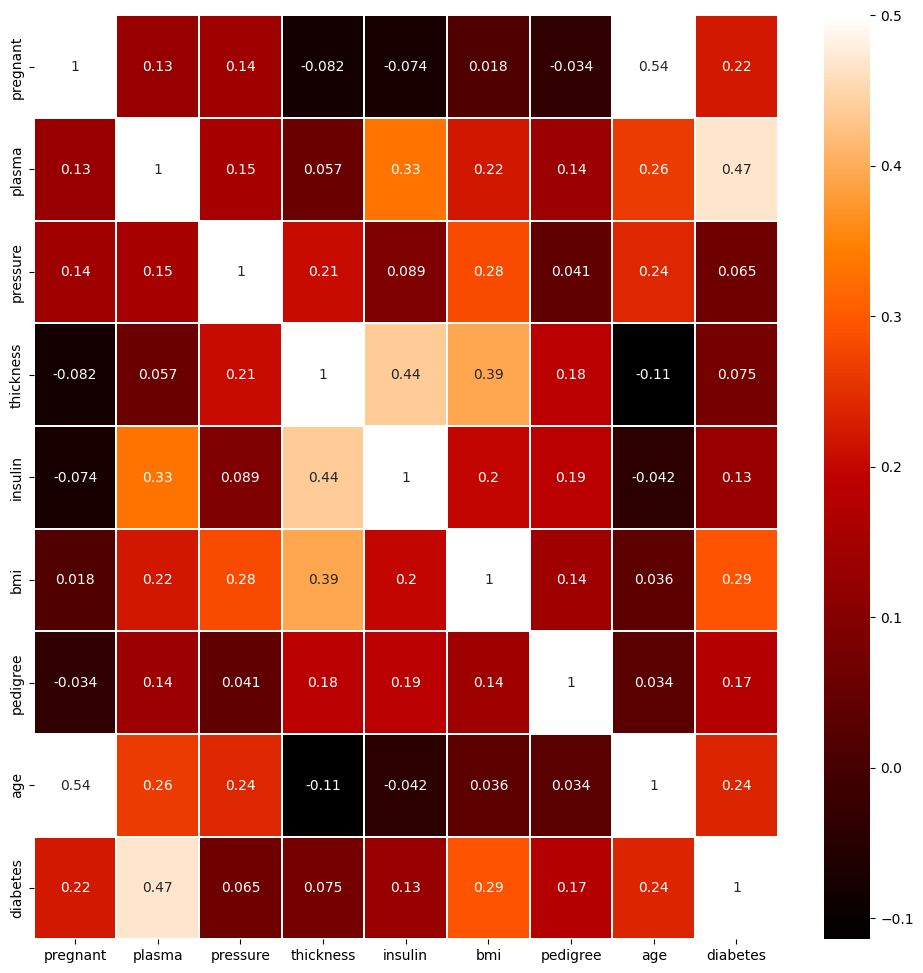

In [8]:
#상관관계 시각화

colormap = plt.cm.gist_heat #그래프의 색상 구성
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

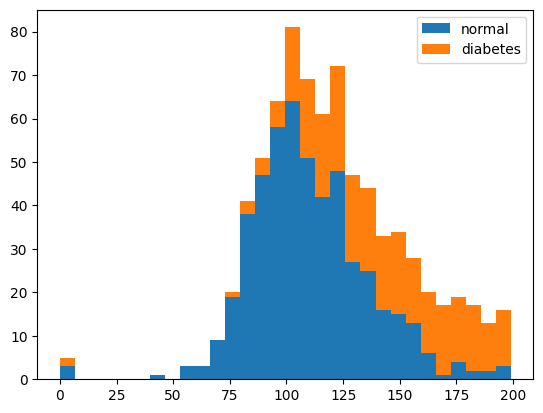

In [9]:
#plasma를 기준으로 정상과 당뇨 여부 분포 확인
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

#plasma가 높을 수록 당뇨일 경우가 많음

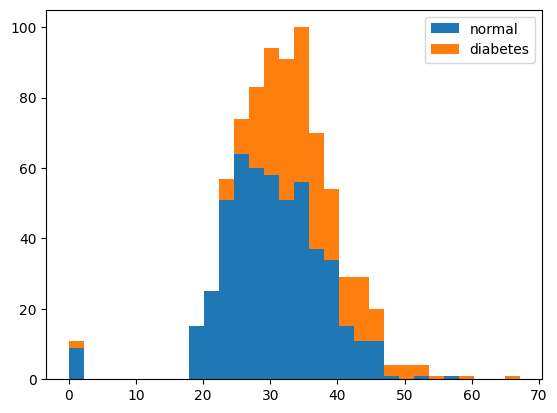

In [10]:
#bmi를 기준으로 정상과 당뇨 여부 분포 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()


tensorflow를 이용하여 당뇨병 예측

In [11]:
x = df.iloc[:, :-1] # 독립변수
y = df.iloc[:, -1] #diabetes

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1')) # 8 * 12 + 12 = 108
model.add(Dense(8, activation='relu', name='Dense_2')) # 8 * 12 + 8 = 104
model.add(Dense(1, activation='sigmoid', name='Dense_3')) # 이진분류 0/1 (8 * 1 + 1 = 9)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# 모델 환경설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
history = model.fit(x,y,epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 2ms/step - loss: 3.0766 - accuracy: 0.5521
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 1.1922 - accuracy: 0.5599
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.9844 - accuracy: 0.5690
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.5742
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.6250
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.6211
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.6081
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.6341
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.6328
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6908 - accura